In [2]:
#Importing relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (15,5)

In [3]:
#Loading data
raw_data = pd.read_csv('Data/Countries-exercise.csv')
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [4]:
#selecting useful variables
x = raw_data[['Longitude','Latitude']]
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


#### Number of clusters

In [5]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

c:\Users\Abdul-Majeed-PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


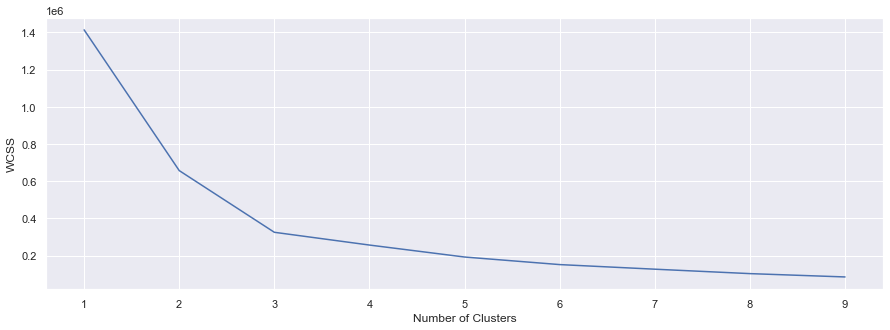

In [6]:
#Finding the right number of clusters
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Clustering

In [7]:
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(n_clusters=5)

In [8]:
#Exracting the clusters
identified_cluster = kmeans.fit_predict(x)

In [9]:
data = raw_data.copy()

In [10]:
#Attaching each rows to it identified cluster
data['Clusters'] = identified_cluster
data.head()

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,4


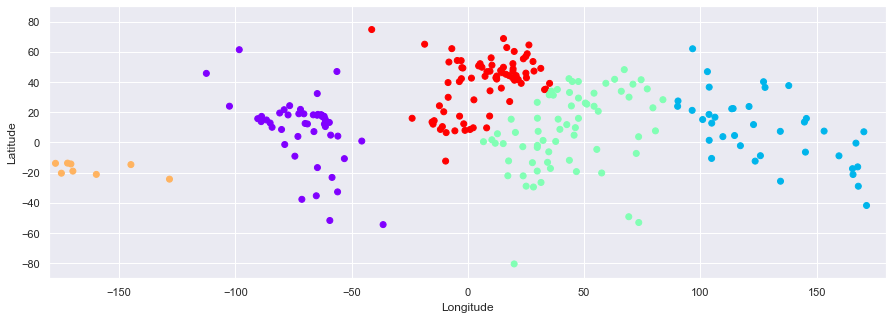

In [11]:
#graphical view of the clusters using scatter plot
plt.scatter(data['Longitude'], data['Latitude'], c=data['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [15]:
data.head()

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,4


No handles with labels found to put in legend.


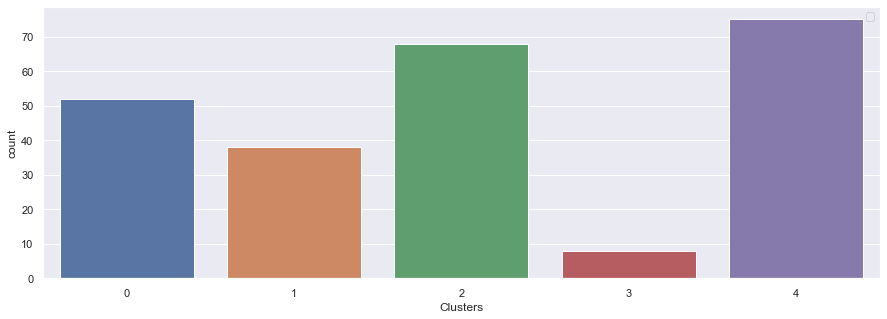

In [18]:
sns.countplot(x = 'Clusters', data = data)
plt.legend()

### Usin clustermap

In [12]:
data1 = pd.read_csv('Data/Countries-exercise.csv', index_col='name')

In [13]:
data1.head()

,Longitude,Latitude
name,,
Aruba,-69.982677,12.520880
Afghanistan,66.004734,33.835231
Angola,17.537368,-12.293361
Anguilla,-63.064989,18.223959
Albania,20.049834,41.142450


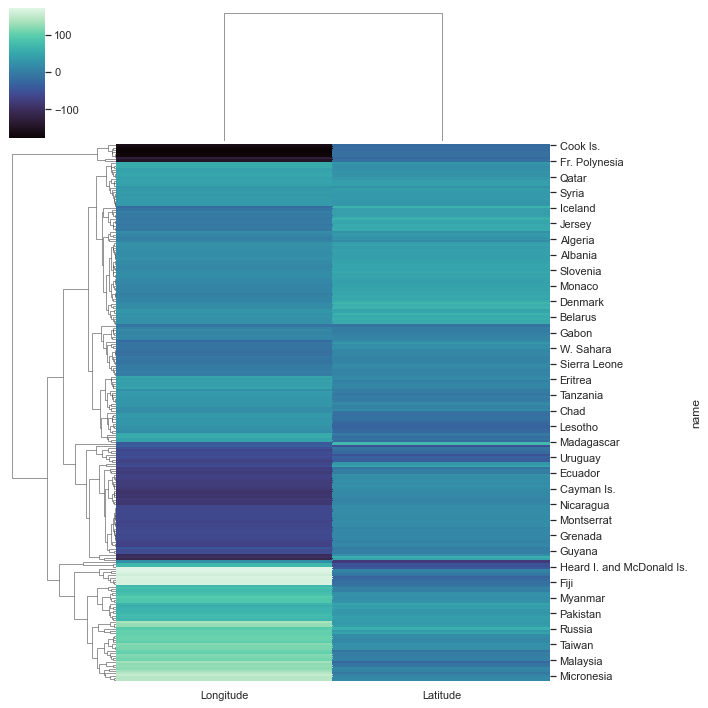

In [14]:
sns.clustermap(data1, cmap='mako')